learning curve

In [5]:
# ========== ----- ========== Import Libraries ========== ----- ========== #

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
# from mlxtend.plotting import plot_decision_regions

# ========== ----- ========== End ========== ----- ========== #

ModuleNotFoundError: No module named 'PIL'

In [7]:
# ========== ----- ========== Import Dataset ========== ----- ========== #

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('dataset.csv')
# Display the first few rows of the DataFrame
# df = df.drop('BMI', axis=1)
print(df.head())

# Load the data and drop BMI feature
X = df.drop(['Body_Level'], axis=1)
y = df['Body_Level']

# ========== ----- ========== End ========== ----- ========== #


   Body_Level  Gender       Age    Height    Weight  H_Cal_Consump  \
0           3       1  0.646666  0.690578  1.016135              1   
1           3       1 -0.649582 -0.003364  0.686578              1   
2           3       0 -0.537725  0.493657  1.790354              1   
3           3       0 -1.291128 -0.545353 -0.036499              1   
4           3       0  0.270463 -0.818715  0.951256              1   

   Veg_Consump  Water_Consump  Smoking  Meal_Count  ...  \
0    -0.199318       0.236558        0    0.402155  ...   
1     0.428856      -1.026715        0   -1.792121  ...   
2     1.069487       1.401741        0    0.402155  ...   
3     0.986227      -1.620907        0    0.402155  ...   
4     1.069487       0.974150        0    0.402155  ...   

   Food_Between_Meals_Always  Food_Between_Meals_Frequently  \
0                          0                              0   
1                          0                              0   
2                          0       

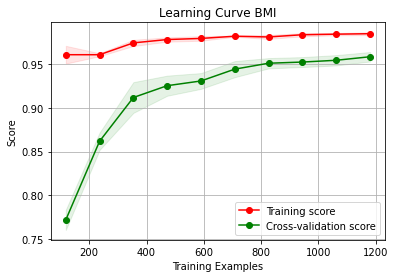

In [8]:
# ========== ----- ========== SVM Model ========== ----- ========== #

model = svm.SVC()

# Define the number of training samples at each iteration
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve BMI")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-',
         color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-',
         color="g", label="Cross-validation score")

# Plot the shaded area indicating the variance (± one standard deviation)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()


# ========== ----- ========== End ========== ----- ========== #


bias variance analysis